In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# mkdir 08_U_of_Montreal_COVID-19_Image_Data_Collection

In [7]:
cd 08_U_of_Montreal_COVID-19_Image_Data_Collection

[Errno 2] No such file or directory: '08_U_of_Montreal_COVID-19_Image_Data_Collection'
/content/08_U_of_Montreal_COVID-19_Image_Data_Collection


In [8]:
# mkdir COVID19_Kaggle_DS

In [9]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3614 (delta 7), reused 11 (delta 5), pack-reused 3599
Receiving objects: 100% (3614/3614), 633.00 MiB | 44.52 MiB/s, done.
Resolving deltas: 100% (1430/1430), done.
Checking out files: 100% (1173/1173), done.


In [10]:
cd /content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS

/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS


In [11]:
#Go to Your Account and click on Create New API Token. A file named kaggle.json
#will get downloaded containing your username and token key
#this file needed to be uploaded to this folder
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS" 
!kaggle datasets download -d plameneduardo/sarscov2-ctscan-dataset

 92% 213M/230M [00:01<00:00, 216MB/s]
100% 230M/230M [00:01<00:00, 169MB/s]


In [12]:
!unzip \*.zip  && rm *.zip

Archive:  sarscov2-ctscan-dataset.zip
  inflating: COVID/Covid (1).png     
  inflating: COVID/Covid (10).png    
  inflating: COVID/Covid (100).png   
  inflating: COVID/Covid (1000).png  
  inflating: COVID/Covid (1001).png  
  inflating: COVID/Covid (1002).png  
  inflating: COVID/Covid (1003).png  
  inflating: COVID/Covid (1004).png  
  inflating: COVID/Covid (1005).png  
  inflating: COVID/Covid (1006).png  
  inflating: COVID/Covid (1007).png  
  inflating: COVID/Covid (1008).png  
  inflating: COVID/Covid (1009).png  
  inflating: COVID/Covid (101).png   
  inflating: COVID/Covid (1010).png  
  inflating: COVID/Covid (1011).png  
  inflating: COVID/Covid (1012).png  
  inflating: COVID/Covid (1013).png  
  inflating: COVID/Covid (1014).png  
  inflating: COVID/Covid (1015).png  
  inflating: COVID/Covid (1016).png  
  inflating: COVID/Covid (1017).png  
  inflating: COVID/Covid (1018).png  
  inflating: COVID/Covid (1019).png  
  inflating: COVID/Covid (102).png   
  inflating:

### Preparing data

In [13]:
import warnings
warnings.filterwarnings("ignore")
import os, cv2, random
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 
import re
# from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
# from keras.optimizers import RMSprop
# from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB6
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Flatten, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


In [14]:
cd /content/08_U_of_Montreal_COVID-19_Image_Data_Collection

/content/08_U_of_Montreal_COVID-19_Image_Data_Collection


In [15]:
df = pd.read_csv('covid-chestxray-dataset/metadata.csv')

In [16]:
df['finding'].value_counts().index


Index(['Pneumonia/Viral/COVID-19', 'todo', 'Pneumonia',
       'Pneumonia/Fungal/Pneumocystis', 'No Finding',
       'Pneumonia/Bacterial/Streptococcus', 'Tuberculosis',
       'Pneumonia/Viral/SARS', 'Pneumonia/Lipoid',
       'Pneumonia/Bacterial/Mycoplasma', 'Pneumonia/Bacterial/Legionella',
       'Pneumonia/Viral/MERS-CoV', 'Pneumonia/Bacterial/Klebsiella',
       'Pneumonia/Bacterial/Nocardia', 'Pneumonia/Viral/Varicella',
       'Pneumonia/Viral/Influenza', 'Pneumonia/Bacterial',
       'Pneumonia/Bacterial/E.Coli', 'Pneumonia/Bacterial/Chlamydophila',
       'Pneumonia/Viral/Herpes ', 'Pneumonia/Fungal/Aspergillosis',
       'Pneumonia/Viral/Influenza/H1N1', 'Pneumonia/Aspiration', 'Unknown',
       'Pneumonia/Bacterial/Staphylococcus/MRSA'],
      dtype='object')

In [17]:
sw = {'Pneumonia/Viral/COVID-19':1,
'todo':0,
'Pneumonia':0,
       'Pneumonia/Fungal/Pneumocystis':0,
'No Finding':0,
       'Pneumonia/Bacterial/Streptococcus':0,
'Tuberculosis':0,
       'Pneumonia/Viral/SARS':0,
'Pneumonia/Lipoid':0,
       'Pneumonia/Bacterial/Mycoplasma':0,
'Pneumonia/Bacterial/Klebsiella':0,
       'Pneumonia/Viral/MERS-CoV':0,
'Pneumonia/Bacterial/Legionella':0,
       'Pneumonia/Bacterial/Nocardia':0,
'Pneumonia/Viral/Varicella':0,
       'Pneumonia/Viral/Influenza':0,
'Pneumonia/Bacterial':0,
       'Pneumonia/Bacterial/E.Coli':0,
'Pneumonia/Viral/Herpes ':0,
       'Pneumonia/Bacterial/Chlamydophila':0,
'Pneumonia/Viral/Influenza/H1N1':0,
       'Pneumonia/Fungal/Aspergillosis':0,
'Unknown':0,
'Pneumonia/Aspiration':0,
       'Pneumonia/Bacterial/Staphylococcus/MRSA':0}
df['COVID19_output'] = df['finding'].replace(sw)

In [18]:
df['COVID19_output'].value_counts()

1    584
0    366
Name: COVID19_output, dtype: int64

In [19]:
df.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'RT_PCR_positive',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29',
       'COVID19_output'],
      dtype='object')

In [20]:
# loading labels for each image from csv
labels = df[['filename','COVID19_output']]
# labels = labels.iloc[:,:]
labels.head()

,filename,COVID19_output
0,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,1
1,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,1
2,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,1
3,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,1
4,nejmc2001573_f1a.jpeg,1


In [21]:
# Separating COVID19 labels
COVID19_data = labels[labels['COVID19_output'] == 1]
COVID19_data.head()

,filename,COVID19_output
0,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,1
1,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,1
2,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,1
3,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,1
4,nejmc2001573_f1a.jpeg,1


In [22]:
# Splitting COVID19 data into train and test
test_COVID19_data = COVID19_data.iloc[-15:,:]
train_COVID19_data = COVID19_data.iloc[:-15,:]

In [23]:
# Separating female labels
Non_COVID19_data = labels[labels['COVID19_output'] == 0]
Non_COVID19_data.head()

,filename,COVID19_output
6,ARDSSevere.png,0
9,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,0
10,SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....,0
11,SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...,0
12,SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...,0


In [24]:
# Splitting Non_COVID19 data into train and test
test_Non_COVID19_data = Non_COVID19_data.iloc[-15:,:]
train_Non_COVID19_data = Non_COVID19_data.iloc[:-15,:]

In [25]:
# img=mpimg.imread('/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/Extra_COVID19_Augmentation/COVID19/aug_12_5299223.png')
# imgplot = plt.imshow(img)
# plt.show()

In [26]:
# total test data
test_indices = test_Non_COVID19_data.index.tolist() + test_COVID19_data.index.tolist()
test_data = labels.iloc[test_indices,:]
test_data = test_data.sample(frac = 1) 
test_data

,filename,COVID19_output
924,4e74cbafeab0bfd317a93e1aace6cf_jumbo.jpg,0
894,8781ac6b9589f3646d2bbfff8f9015_jumbo.jpeg,1
944,d2c8a74b37d8d1581ea2a8fe865ef3_jumbo-10.jpeg,0
942,15d081345df9ca620ebe5e76023775_jumbo-10.jpeg,0
927,800f798a58d0cbcc72eb234f192461_jumbo.jpeg,0
930,16953_1_1.jpg,1
940,16865_1_2.jpg,1
948,000001-272.jpg,0
909,078d2e0b3e4fec1d603efb0e818c31_jumbo.jpeg,1
939,16865_1_1.jpg,1


In [27]:
# total train data
train_data = pd.concat([train_Non_COVID19_data, train_COVID19_data]).drop_duplicates(keep=False)
# delete some pad images with ending with .gz not with known image format
ind = []
for i,x in enumerate(train_data['filename']):
  if re.search('.gz$',x):
    ind.append(train_data[train_data['filename']==x].index[0])
train_data= train_data.drop(ind)
train_data = train_data.sample(frac = 1) 
train_data.head()

,filename,COVID19_output
819,1-s2.0-S0378603X1500248X-gr4e.jpg,0
550,701_2020_4374_Fig2_HTML.png,1
299,wong-0002.jpg,0
543,68_2020_1364_Fig1_HTML-b.png,1
826,fff13f3a.jpg,0


# X and Y_train Montreal

In [28]:
# preparing data by processing images using opencv
ROWS = 128
COLS = 128
CHANNELS = 3

In [29]:
# train and test with image name along with paths
path = '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/covid-chestxray-dataset/images/'
train_image_name = [path+each for each in train_data['filename'].values.tolist()]
test_image_name = [path+each for each in test_data['filename'].values.tolist()]

In [30]:
def read_image(file_path):
    try:
      img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
      return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
    except :
      print(file_path,img)


def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%5 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

train = prep_data(train_image_name)
test = prep_data(test_image_name) 

Processed 0 of 899
Processed 5 of 899
Processed 10 of 899
Processed 15 of 899
Processed 20 of 899
Processed 25 of 899
Processed 30 of 899
Processed 35 of 899
Processed 40 of 899
Processed 45 of 899
Processed 50 of 899
Processed 55 of 899
Processed 60 of 899
Processed 65 of 899
Processed 70 of 899
Processed 75 of 899
Processed 80 of 899
Processed 85 of 899
Processed 90 of 899
Processed 95 of 899
Processed 100 of 899
Processed 105 of 899
Processed 110 of 899
Processed 115 of 899
Processed 120 of 899
Processed 125 of 899
Processed 130 of 899
Processed 135 of 899
Processed 140 of 899
Processed 145 of 899
Processed 150 of 899
Processed 155 of 899
Processed 160 of 899
Processed 165 of 899
Processed 170 of 899
Processed 175 of 899
Processed 180 of 899
Processed 185 of 899
Processed 190 of 899
Processed 195 of 899
Processed 200 of 899
Processed 205 of 899
Processed 210 of 899
Processed 215 of 899
Processed 220 of 899
Processed 225 of 899
Processed 230 of 899
Processed 235 of 899
Processed 240 

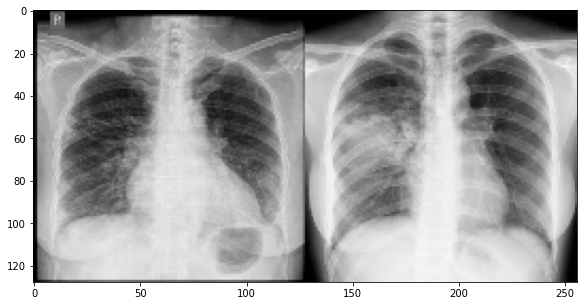

In [31]:
# plotting Non_COVID19 and COVID19 side by side
def show_COVID19_and_Non_COVID19():
    Non_COVID19 = read_image(train_image_name[0])
    COVID19 = read_image(train_image_name[2])
    pair = np.concatenate((Non_COVID19, COVID19), axis=1)
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
    
show_COVID19_and_Non_COVID19()

In [32]:
  # splitting path of all images into COVID19 and Non_COVID19
train_COVID19_image = []
train_Non_COVID19_image = []
for each in train_image_name:
    if each.split('/')[5] in train_COVID19_data['filename'].values:
        train_COVID19_image.append(each)
    else:
        train_Non_COVID19_image.append(each)

In [33]:
X = np.array(train).reshape(-1, ROWS, COLS,3)
X_test = np.array(test).reshape(-1, ROWS, COLS,3)
X = X / 255.0
X_test = X_test / 255.0
X = tf. convert_to_tensor(X)
X_test = tf. convert_to_tensor(X_test)

y_train = train_data.iloc[:,1].values.tolist()
Y_train=[]
for x in y_train:
  if x == 1 :
    Y_train.append((1,0))
  else:
    Y_train.append((0,1))

Y_train = tf. convert_to_tensor(Y_train)

y_test = test_data.iloc[:,1].values.tolist()
Y_test=[]
for x in y_test:
  if x == 1 :
    Y_test.append((1,0))
  else:
    Y_test.append((0,1))
Y_test = tf. convert_to_tensor(Y_test) 

# X and Y_train for Other CT scan data

In [34]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk('/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS/COVID/'):
    f.extend(filenames)
    break
f2 = []
for (dirpath, dirnames, filenames) in walk('/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS/non-COVID'):
    f2.extend(filenames)
    break   
print(len(f),len(f2))

1252 1229


In [35]:
# train and test with image name along with paths
path1 = '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS/COVID/'
COVID_name = [path1+each for each in f]
path2 = '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS/non-COVID/'
Non_COVID_name = [path2+each for each in f2]

In [36]:
def read_image(file_path):
    try:
      img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
      return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
    except :
      print(file_path,img)


def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%5 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

COVID_ds = prep_data(COVID_name)
Non_COVID_ds = prep_data(Non_COVID_name)

Processed 0 of 1252
Processed 5 of 1252
Processed 10 of 1252
Processed 15 of 1252
Processed 20 of 1252
Processed 25 of 1252
Processed 30 of 1252
Processed 35 of 1252
Processed 40 of 1252
Processed 45 of 1252
Processed 50 of 1252
Processed 55 of 1252
Processed 60 of 1252
Processed 65 of 1252
Processed 70 of 1252
Processed 75 of 1252
Processed 80 of 1252
Processed 85 of 1252
Processed 90 of 1252
Processed 95 of 1252
Processed 100 of 1252
Processed 105 of 1252
Processed 110 of 1252
Processed 115 of 1252
Processed 120 of 1252
Processed 125 of 1252
Processed 130 of 1252
Processed 135 of 1252
Processed 140 of 1252
Processed 145 of 1252
Processed 150 of 1252
Processed 155 of 1252
Processed 160 of 1252
Processed 165 of 1252
Processed 170 of 1252
Processed 175 of 1252
Processed 180 of 1252
Processed 185 of 1252
Processed 190 of 1252
Processed 195 of 1252
Processed 200 of 1252
Processed 205 of 1252
Processed 210 of 1252
Processed 215 of 1252
Processed 220 of 1252
Processed 225 of 1252
Processed 

In [37]:
XT = np.array(COVID_ds).reshape(-1, ROWS, COLS,3)
XT2 = np.array(Non_COVID_ds).reshape(-1, ROWS, COLS,3)
yt= []
yt2 = []
for x in XT:
  yt.append((1,0))
for x in XT2:
  yt2.append((0,1))
XX = np.concatenate((XT, XT2))
YY = np.concatenate((yt, yt2))
edf = pd.DataFrame(columns=['image','label'])
for i, x in enumerate(XX):
  edf = edf.append({'image':XX[i],'label':YY[i]},ignore_index=True)
edf = edf.sample(frac=1)
test_COVID19_data2 = edf.iloc[-400:,:]
edf = edf.iloc[:-400,:]
XTF = edf['image']
XTFt = test_COVID19_data2['image']
YTF = edf['label']
YTFt = test_COVID19_data2['label']
XTF = tf. convert_to_tensor(list(XTF/255))
YTF = tf. convert_to_tensor(list(YTF/255))
XTFt = tf. convert_to_tensor(list(XTFt/255))
YTFt = tf. convert_to_tensor(list(YTFt/255))

In [38]:
XF_train = np.concatenate((X,XTF))
YF_train = np.concatenate((Y_train,YTF))
XF_test = np.concatenate((X_test,XTFt))
YF_test = np.concatenate((Y_test,YTFt))


In [39]:
print('XF_train shape: %s, YF_train: %s, XF_test: %s, \nYF_test sample: \n%s'%(XF_train.shape,YF_train.shape,XF_test.shape,YF_test[0:5]))

XF_train shape: (2980, 128, 128, 3), YF_train: (2980, 2), XF_test: (430, 128, 128, 3), 
YF_test sample: 
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# XFinal & YFinal train/test Data Augmentation

In [40]:
cd /content/08_U_of_Montreal_COVID-19_Image_Data_Collection

/content/08_U_of_Montreal_COVID-19_Image_Data_Collection


In [41]:
mkdir COVID19_Kaggle_DS2

In [42]:
mv /content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS/non-COVID /content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS2/non-COVID

In [43]:
mkdir Extra_COVID19_Augmentation 

In [44]:
cd /content/08_U_of_Montreal_COVID-19_Image_Data_Collection/Extra_COVID19_Augmentation

/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/Extra_COVID19_Augmentation


In [45]:
mkdir COVID

In [46]:
mkdir Non_COVID

In [47]:
# train and test with image name along with paths
path = '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/covid-chestxray-dataset/images/'
COVID19_image_name = [path+each for each in train_COVID19_data['filename'].values.tolist()]
Non_COVID19_image_name = [path+each for each in train_Non_COVID19_data['filename'].values.tolist()]

In [48]:
train_COVID19_data['filename'] = COVID19_image_name
train_Non_COVID19_data['filename'] = Non_COVID19_image_name

In [49]:

image_directory = '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/covid-chestxray-dataset/images'

Save_directory_COVID = '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/Extra_COVID19_Augmentation/COVID'
Save_directory_Non_COVID = '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/Extra_COVID19_Augmentation/Non_COVID'


datagen = ImageDataGenerator(        
            rotation_range=45,
            width_shift_range=0.2,  
            height_shift_range=0.2,    
            shear_range=0.2,        
            zoom_range=0.2,        
            horizontal_flip=True,         
            fill_mode='reflect')

# datass = 
i=0
for data_train in datagen.flow_from_dataframe(dataframe=train_COVID19_data,
                                       x_col="filename",
                                       y_col="COVID19_output",
                                       target_size=(ROWS, COLS),   
                                       color_mode="rgb", 
                                      classes=['1','0'],
                                       class_mode='raw',
                                       batch_size=16,
                                       shuffle=True,
                                       save_to_dir=Save_directory_COVID,   
                                       save_prefix='aug',    
                                       save_format='png',
                                        subset=None,
                                        validate_filenames=True,
                                       ):
   i += 1    
   if i > 80:        
     break
i=0
for data_test in datagen.flow_from_dataframe(dataframe=train_Non_COVID19_data,
                                       x_col="filename",
                                       y_col="COVID19_output",
                                       target_size=(ROWS, COLS),   
                                       color_mode="rgb", 
                                      classes=['1','0'],
                                       class_mode='raw',
                                       batch_size=16,
                                       shuffle=True,
                                       save_to_dir=Save_directory_Non_COVID,   
                                       save_prefix='aug',    
                                       save_format='png',
                                        subset=None,
                                        validate_filenames=True,
                                       ):
   i += 1    
   if i > 80:        
     break

# datagen.flow_from_dataframe(dataframe=train_Non_COVID19_data,
#                                        x_col="filename",
#                                        y_col="COVID19_output",
#                                        target_size=(ROWS, COLS),   
#                                        color_mode="rgb", 
#                                        classes=['COVID195','Non_COVID195'],
#                                        class_mode="categorical",
#                                        batch_size=1,
#                                        shuffle=False,
#                                        save_to_dir=Save_directory_Non_COVID,   
#                                        save_prefix='aug',    
#                                        save_format='png',
#                                        subset=None,
#                                        interpolation="nearest",
#                                        validate_filenames=True,
#                                        )   

Found 548 validated image filenames.
Found 351 validated image filenames.


In [50]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io

datagen = ImageDataGenerator(        
            rotation_range=45,
            width_shift_range=0.2,  
            height_shift_range=0.2,    
            shear_range=0.2,        
            zoom_range=0.2,        
            horizontal_flip=True,         
            fill_mode='reflect')

import numpy as np
import os
from PIL import Image

image_directory = '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS/'
image_directory2 = '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS2/'

Save_directory_COVID = '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/Extra_COVID19_Augmentation/COVID'
Save_directory_Non_COVID = '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/Extra_COVID19_Augmentation/Non_COVID'

i = 0
for batch0 in datagen.flow_from_directory(directory=image_directory,
                                          batch_size=16,
                                          target_size=(ROWS, COLS),   
                                          color_mode="rgb",    
                                          save_to_dir=Save_directory_COVID,   
                                          save_prefix='aug',    
                                          save_format='png'):    
   i += 1    
   if i > 100:        
     break

i=0
for batch1 in datagen.flow_from_directory(directory=image_directory2,
                                          batch_size=16,
                                          target_size=(ROWS, COLS),   
                                          color_mode="rgb",     
                                          save_to_dir=Save_directory_Non_COVID,   
                                          save_prefix='aug',    
                                          save_format='png'):    
   i += 1    
   if i > 100:        
     break

Found 1252 images belonging to 1 classes.
Found 1229 images belonging to 1 classes.


In [51]:
mv /content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS2/non-COVID /content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS

In [52]:
rm /content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS2/

rm: cannot remove '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS2/': Is a directory


In [53]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk('/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/Extra_COVID19_Augmentation/COVID'):
    f.extend(filenames)
    break
f2 = []
for (dirpath, dirnames, filenames) in walk('/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/Extra_COVID19_Augmentation/Non_COVID'):
    f2.extend(filenames)
    break   
print(len(f),len(f2))

2876 2906


In [54]:
# train and test with image name along with paths
path1 = '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/Extra_COVID19_Augmentation/COVID/'
COVID_name = [path1+each for each in f]
path2 = '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/Extra_COVID19_Augmentation/Non_COVID/'
Non_COVID_name = [path2+each for each in f2]

In [55]:
def read_image(file_path):
    try:
      img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
      return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
    except :
      print(file_path,img)


def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%5 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

COVID_ds = prep_data(COVID_name)
Non_COVID_ds = prep_data(Non_COVID_name)

Processed 0 of 2876
Processed 5 of 2876
Processed 10 of 2876
Processed 15 of 2876
Processed 20 of 2876
Processed 25 of 2876
Processed 30 of 2876
Processed 35 of 2876
Processed 40 of 2876
Processed 45 of 2876
Processed 50 of 2876
Processed 55 of 2876
Processed 60 of 2876
Processed 65 of 2876
Processed 70 of 2876
Processed 75 of 2876
Processed 80 of 2876
Processed 85 of 2876
Processed 90 of 2876
Processed 95 of 2876
Processed 100 of 2876
Processed 105 of 2876
Processed 110 of 2876
Processed 115 of 2876
Processed 120 of 2876
Processed 125 of 2876
Processed 130 of 2876
Processed 135 of 2876
Processed 140 of 2876
Processed 145 of 2876
Processed 150 of 2876
Processed 155 of 2876
Processed 160 of 2876
Processed 165 of 2876
Processed 170 of 2876
Processed 175 of 2876
Processed 180 of 2876
Processed 185 of 2876
Processed 190 of 2876
Processed 195 of 2876
Processed 200 of 2876
Processed 205 of 2876
Processed 210 of 2876
Processed 215 of 2876
Processed 220 of 2876
Processed 225 of 2876
Processed 

In [56]:
del XTF, YTF, XT, XT2, yt, yt2, XX, YY, edf, test_COVID19_data2, train,test , X, y_train

In [57]:
XTX = np.array(COVID_ds).reshape(-1, ROWS, COLS,3)
XTX2 = np.array(Non_COVID_ds).reshape(-1, ROWS, COLS,3)
ytY= []
ytY2 = []
for x in XTX:
  ytY.append((1,0))
for x in XTX2:
  ytY2.append((0,1))
XX = np.concatenate((XTX, XTX2))
YY = np.concatenate((ytY, ytY2))
edf = pd.DataFrame(columns=['image','label'])
for i, x in enumerate(XX):
  edf = edf.append({'image':XX[i],'label':YY[i]},ignore_index=True)
edf = edf.sample(frac=1)
test_COVID19_data2 = edf.iloc[-400:,:]
edf = edf.iloc[:-400,:]
XTXF = edf['image']
XTXFt = test_COVID19_data2['image']
YTYF = edf['label']
YTYFt = test_COVID19_data2['label']
XTXF = tf. convert_to_tensor(list(XTXF/255))
YTYF = tf. convert_to_tensor(list(YTYF/255))
XTXFt = tf. convert_to_tensor(list(XTXFt/255))
YTYFt = tf. convert_to_tensor(list(YTYFt/255))

In [58]:
del XTX, XTX2, ytY, ytY2, XX, YY, edf, test_COVID19_data2, COVID_ds, Non_COVID_ds

In [59]:
XF_train = np.concatenate((XF_train,XTXF))
YF_train = np.concatenate((YF_train,YTYF))
XF_test = np.concatenate((XF_test,XTXFt))
YF_test = np.concatenate((YF_test,YTYFt))


In [60]:
del XTXF, YTYF

In [61]:
print('XF_train shape: %s, YF_train: %s, XF_test: %s, \nYF_test sample: \n%s'%(XF_train.shape,YF_train.shape,XF_test.shape,YF_test[0:5]))

XF_train shape: (8362, 128, 128, 3), YF_train: (8362, 2), XF_test: (830, 128, 128, 3), 
YF_test sample: 
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [62]:
# np.save("/content/drive/My Drive/C3_ctscan/XF_train.npy", XF_train)
# np.save("/content/drive/My Drive/C3_ctscan/YF_train.npy", YF_train)
# np.save("/content/drive/My Drive/C3_ctscan/XF_test.npy", XF_test)
# np.save("/content/drive/My Drive/C3_ctscan/YF_test.npy", YF_test)

## Test Models

In [63]:
# XF_train = np.load("/content/drive/My Drive/C3_ctscan/XF_train.npy")
# YF_train = np.load("/content/drive/My Drive/C3_ctscan/XF_train.npy")
# XF_test = np.load("/content/drive/My Drive/C3_ctscan/XF_train.npy")
# YF_test = np.load("/content/drive/My Drive/C3_ctscan/XF_train.npy")

In [69]:
del base_model, x, model

In [70]:
from tensorflow.keras.applications import EfficientNetB7

# create the base pre-trained model
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_tensor=Input(shape=(ROWS, COLS, 3)))

x = base_model.output
x = GlobalAveragePooling2D()(x)
# # let's add a fully-connected layer
# x = Flatten()(x)
x = Dense(2024, activation='relu')(x)
# x = BatchNormalization()(x)
x = Dropout(0.2)(x)
# x = Dense(1024, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.1)(x)
x = Dense(512, activation='relu')(x)
# x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
# x = BatchNormalization()(x)
x = Dropout(0.1)(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# InceptionV3
# base_model = EfficientNetB6(weights='imagenet', include_top=False)

# The model weights (that are considered the best) are loaded into the model
# model.load_weights('/content/drive/My Drive/Colab Notebooks/C3_data_challenge/100_COVID19_EfficientNetB6_model.h5') 

model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 128, 128, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 128, 128, 3)  7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 129, 129, 3)  0           normalization_2[0][0]            
_______________________________________________________________________________________

In [ ]:
initial_epochs = 20
initial_batch_size = 16

tf.config.run_functions_eagerly(True)

checkpoint_filepath = '/content/drive/My Drive/C3_ctscan/COVID19_EfficientNetB7_model.h5'

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, 
                                                               monitor='loss', mode='min', save_best_only=True)

for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

# train the model on the new data for a few epochs
history = model.fit(XF_train, YF_train, epochs=initial_epochs, 
                    batch_size=initial_batch_size, callbacks=[model_checkpoint_callback])
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
# for i, layer in enumerate(base_model.layers):
#    print('Layer count and names:\n',i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[: 337]:
   layer.trainable = False
for layer in model.layers[ 337:]:
   layer.trainable = True


# initial_epochs = 50
# initial_batch_size = 32

fine_tune_epochs = 50
total_epochs =  initial_epochs + fine_tune_epochs
final_batch_size = 32


# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0005, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])


model.load_weights(checkpoint_filepath) 
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history = model.fit(XF_train, YF_train, epochs=total_epochs,
                    initial_epoch= history.epoch[-1], 
                    batch_size=final_batch_size, verbose=1, 
                    callbacks=[model_checkpoint_callback])


test_loss, test_acc = model.evaluate(XF_test, YF_test, verbose=1)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Epoch 1/20
523/523 [==============================] - 266s 509ms/step - loss: 0.6707 - accuracy: 0.5090
Epoch 2/20
523/523 [==============================] - 263s 503ms/step - loss: 0.7049 - accuracy: 0.5103
Epoch 3/20
523/523 [==============================] - 264s 504ms/step - loss: 0.7049 - accuracy: 0.5104
Epoch 4/20
523/523 [==============================] - 266s 509ms/step - loss: 0.7029 - accuracy: 0.5106
Epoch 5/20
129/523 [======>.......................] - ETA: 3:20 - loss: 0.7085 - accuracy: 0.4971

In [ ]:


# The model weights (that are considered the best) are loaded into the model
model.load_weights('/content/drive/My Drive/Colab Notebooks/C3_data_challenge/95_Great_COVID19_EfficientNetB6_model.h5') 


model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 256, 256, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

In [ ]:
fine_tune_epochs = 25
total_epochs =  total_epochs + fine_tune_epochs

final_batch_size = 10


for layer in model.layers[: 249]:
   layer.trainable = False
for layer in model.layers[ 249:]:
   layer.trainable = True


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history_fine = model.fit(XF_train, YF_train, validation_split=0.2, epochs=total_epochs, 
                         initial_epoch= history.epoch[-1], batch_size=final_batch_size,
                         verbose=1,callbacks=[model_checkpoint_callback])

test_loss, test_acc = model.evaluate(XF_test, YF_test, verbose=1)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Epoch 30/50
255/255 [==============================] - 167s 655ms/step - loss: 0.2844 - accuracy: 0.9096 - val_loss: 0.0296 - val_accuracy: 0.9874
Epoch 31/50
255/255 [==============================] - 168s 659ms/step - loss: 0.2917 - accuracy: 0.9029 - val_loss: 0.0324 - val_accuracy: 0.9906
Epoch 32/50
255/255 [==============================] - 169s 662ms/step - loss: 0.1935 - accuracy: 0.9296 - val_loss: 0.0418 - val_accuracy: 0.9858
Epoch 33/50
255/255 [==============================] - 169s 663ms/step - loss: 0.1466 - accuracy: 0.9461 - val_loss: 0.0293 - val_accuracy: 0.9921
Epoch 34/50
255/255 [==============================] - 169s 661ms/step - loss: 0.1378 - accuracy: 0.9489 - val_loss: 0.0336 - val_accuracy: 0.9953
Epoch 35/50
255/255 [==============================] - 170s 667ms/step - loss: 0.1513 - accuracy: 0.9481 - val_loss: 0.0226 - val_accuracy: 0.9984
Epoch 36/50
255/255 [==============================] - 171s 670ms/step - loss: 0.1101 - accuracy: 0.9603 - val_loss: 0

In [ ]:
# Save the weights
# model.save('my_model.h5') 
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/C3_data_challenge/my_model.h5')

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 256, 256, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

## Result & Tests


In [ ]:
image = tf.reshape(XF_test[19],(-1, ROWS, COLS,3))/255
preds = model.predict(image) # Predict image
print(preds,round(preds[0][0],0),YF_test[19])

[[0.7341118 0.2658882]] 1.0 [1. 0.]


In [ ]:
result = []
fig = plt.figure(figsize = (25, 30))

for i, j in enumerate(XF_test): # i - for subplots
    orig = j # Original, not resized image
    label = YF_test[i] # Label for that image
    # print(type(orig),orig.shape,label)
    image = tf.reshape(orig,(-1, ROWS, COLS,3)) # Reshape and scale resized image
    preds = model.predict(image) # Predict image
    # print(np.int(label[0]))
    
    true_label = 'True class: %s' %(np.int(label[0]))
    pred_label = '%s %% ,it is Predicted: %s' %(round(max(preds[0][0:2]),2),round(preds[0][0],0))
    if (np.int(label[0]) == round(preds[0][0],0) ):
      result.append(1)
    else :
      result.append(0)
print("number of correct predict %s,from: %s, accurecy%% = %s%%" %(np.sum(result),len(result),np.mean(result)))  

number of correct predict 156,from: 430, accurecy% = 0.3627906976744186%


<Figure size 1800x2160 with 0 Axes>

In [ ]:
result = []
fig = plt.figure(figsize = (25, 30))

for i, j in enumerate(zip(X_test, Y_test)): # i - for subplots
    orig = j[0] # Original, not resized image
    label = j[1] # Label for that image
    # print(type(orig),orig.shape,label)
    image = tf.reshape(orig,(-1, ROWS, COLS,3)) # Reshape and scale resized image
    preds = model.predict(image) # Predict image
    # print(np.int(label[0]))
    
    true_label = 'True class: %s' %(np.int(label[0]))
    pred_label = '%s %% ,it is Predicted: %s' %(round(max(preds[0][0:2]),2),round(preds[0][0],0))
    if (np.int(label[0]) == round(preds[0][0],0) ):
      result.append(1)
    else :
      result.append(0)
    # fig.add_subplot(6, 5, i+1)
    # plt.imshow(orig[:, :, ::-1])
    # plt.title(f'{true_label}\n{pred_label}', fontsize=22)
    # plt.axis('off')
print("number of correct predict %s,from: %s, accurecy%% = %s%%" %(np.sum(result),len(result),np.mean(result)))  
plt.tight_layout()

number of correct predict 14,from: 30, accurecy% = 0.4666666666666667%


<Figure size 1800x2160 with 0 Axes>

In [ ]:
result = []
fig = plt.figure(figsize = (25, 30))

for i, j in enumerate(XF_test[60:90]): # i - for subplots
    orig = j # Original, not resized image
    label = YF_test[i+60] # Label for that image
    # print(type(orig),orig.shape,label)
    image = tf.reshape(orig,(-1, ROWS, COLS,3)) # Reshape and scale resized image
    preds = model.predict(image) # Predict image
    # print(np.int(label[0]))
    
    true_label = 'True class: %s' %(np.int(label[0]))
    pred_label = '%s %% ,it is Predicted: %s' %(round(max(preds[0][0:2]),2),round(preds[0][0],0))
    if (np.int(label[0]) == round(preds[0][0],0) ):
      result.append(1)
    else :
      result.append(0)
    # fig.add_subplot(6, 5, i+1)
    # plt.imshow(orig[:, :, ::-1])
    # plt.title(f'{true_label}\n{pred_label}', fontsize=22)
    # plt.axis('off')
    # print('true_label: %s, pred_label: %s'%(np.int(label[0]),round(preds[0][0],0)))
print("number of correct predict %s,from: %s, accurecy%% = %s%%" %(np.sum(result),len(result),np.mean(result)))  
plt.tight_layout()

number of correct predict 11,from: 30, accurecy% = 0.36666666666666664%


<Figure size 1800x2160 with 0 Axes>

# Extra Ct Scan Image

In [ ]:
cd /content/08_U_of_Montreal_COVID-19_Image_Data_Collection

/content/08_U_of_Montreal_COVID-19_Image_Data_Collection


In [ ]:
mkdir COVID19_Kaggle_DS_Test

In [ ]:
cd /content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS_Test

/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS_Test


In [ ]:
#Go to Your Account and click on Create New API Token. A file named kaggle.json
#will get downloaded containing your username and token key
#this file needed to be uploaded to this folder
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS_Test" 
!kaggle datasets download -d luisblanche/covidct

 90% 77.0M/85.8M [00:03<00:00, 13.4MB/s]
100% 85.8M/85.8M [00:03<00:00, 24.8MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

In [ ]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk('/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS_Test/CT_COVID'):
    f.extend(filenames)
    break
f2 = []
for (dirpath, dirnames, filenames) in walk('/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS_Test/CT_NonCOVID'):
    f2.extend(filenames)
    break   
print(len(f),len(f2))

349 397


In [ ]:
# train and test with image name along with paths
path1 = '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS_Test/CT_COVID/'
CT_COVID_name = [path1+each for each in f]
path2 = '/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS_Test/CT_NonCOVID/'
CT_Non_COVID_name = [path2+each for each in f2]

In [ ]:
# preparing data by processing images using opencv
ROWS = 256
COLS = 256
CHANNELS = 3

def read_image(file_path):
    try:
      img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
      return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
    except :
      print(file_path,img)


def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%5 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

CT_COVID_ds = prep_data(CT_COVID_name)
CT_Non_COVID_ds = prep_data(CT_Non_COVID_name)

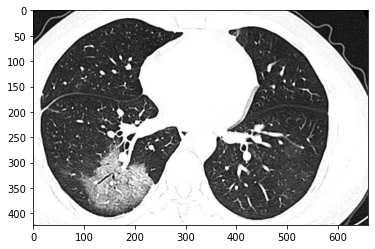

In [ ]:

img=mpimg.imread('/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS_Test/CT_COVID/2020.03.22.20040782-p25-1544.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
XT = np.array(CT_COVID_ds).reshape(-1, ROWS, COLS,3)
XT2 = np.array(CT_Non_COVID_ds).reshape(-1, ROWS, COLS,3)
yt= []
yt2 = []
for x in XT:
  yt.append((1,0))
for x in XT2:
  yt2.append((0,1))
XX = np.concatenate((XT, XT2))
YY = np.concatenate((yt, yt2))
edf = pd.DataFrame(columns=['image','label'])
for i, x in enumerate(XX):
  edf = edf.append({'image':XX[i],'label':YY[i]},ignore_index=True)
edf = edf.sample(frac=1)
test_COVID19_data2 = edf.iloc[-100:,:]
edf = edf.iloc[:-100,:]
XTF = edf['image']
XTFt = test_COVID19_data2['image']
YTF = edf['label']
YTFt = test_COVID19_data2['label']
XTF = tf. convert_to_tensor(list(XTF))
YTF = tf. convert_to_tensor(list(YTF))
XTFt = tf. convert_to_tensor(list(XTFt))
YTFt = tf. convert_to_tensor(list(YTFt))

In [ ]:
# # img = cv2.imread('/content/08_U_of_Montreal_COVID-19_Image_Data_Collection/COVID19_Kaggle_DS/COVID/Covid (1).png', cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
# # img = cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
# # image = read_image(img)
# data = img.T

image = tf.reshape(XTF[19],(-1, 256, 256,3))#/255
preds = model.predict(image) # Predict image

print(preds,round(preds[0][0],0),YTF[19])

[[0.92523307 0.07476691]] 1.0 tf.Tensor([1 0], shape=(2,), dtype=int32)


In [ ]:
result = []
fig = plt.figure(figsize = (25, 30))

for i, j in enumerate(XTFt): # i - for subplots
    orig = j # Original, not resized image
    label = YTFt[i] # Label for that image
    # print(type(orig),orig.shape,label)
    image = tf.reshape(orig,(-1, 256, 256,3)) # Reshape and scale resized image
    preds = model.predict(image) # Predict image
    # print(np.int(label[0]))
    
    true_label = 'True class: %s' %(np.int(label[0]))
    pred_label = '%s %% ,it is Predicted: %s' %(round(max(preds[0][0:2]),2),round(preds[0][0],0))
    if (np.int(label[0]) == round(preds[0][0],0) ):
      result.append(1)
    else :
      result.append(0)
    # fig.add_subplot(6, 5, i+1)
    # plt.imshow(orig[:, :, ::-1])
    # plt.title(f'{true_label}\n{pred_label}', fontsize=22)
    # plt.axis('off')
    print('true_label: %s, pred_label: %s'%(np.int(label[0]),round(preds[0][0],0)))
print("number of correct predict %s,from: %s, accurecy%% = %s%%" %(np.sum(result),len(result),np.mean(result)))  